In [2]:
import numpy as np
import pandas as pd
import sklearn as sk

In [3]:
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore


In [6]:
print(tf.__version__)
print(sk.__version__)
print(np.__version__)
print(pd.__version__)

2.18.0
1.5.2
1.26.4
2.2.2


In [5]:
training_dir="D:\\Learnings\\Machinester Program May'24\\Projects\\Pnemonia detection using chest x-rays\\chest_xray\\train"
training_generator= ImageDataGenerator(rescale=1./255)
training_data = training_generator.flow_from_directory(training_dir, target_size=(200,200), class_mode='binary')

Found 5216 images belonging to 2 classes.


In [6]:
val_dir=r"D:\Learnings\Machinester Program May'24\Projects\Pnemonia detection using chest x-rays\chest_xray\val"
val_generator= ImageDataGenerator(rescale=1./255)
val_data = val_generator.flow_from_directory(val_dir, target_size=(200,200), class_mode='binary')

Found 16 images belonging to 2 classes.


In [7]:
test_dir=r"D:\Learnings\Machinester Program May'24\Projects\Pnemonia detection using chest x-rays\chest_xray\test"
test_generator= ImageDataGenerator(rescale=1./255)
test_data = test_generator.flow_from_directory(test_dir, target_size=(200,200), class_mode='binary')

Found 624 images belonging to 2 classes.


In [8]:
import tensorflow as tf # type: ignore

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(200, 200, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [10]:
history = model.fit(training_data,
            validation_data=val_data,
            epochs=100,
            verbose=1)

Epoch 1/100


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 359s 2s/step - acc: 0.7414 - loss: 0.6342 - val_acc: 0.7500 - val_loss: 0.5608
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 304s 2s/step - acc: 0.9296 - loss: 0.1754 - val_acc: 0.6875 - val_loss: 0.7692
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 287s 2s/step - acc: 0.9469 - loss: 0.1339 - val_acc: 0.7500 - val_loss: 0.3620
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 277s 2s/step - acc: 0.9608 - loss: 0.1094 - val_acc: 0.9375 - val_loss: 0.2049
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 276s 2s/step - acc: 0.9582 - loss: 0.1116 - val_acc: 0.8125 - val_loss: 0.3814
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 277s 2s/step - acc: 0.9699 - loss: 0.0865 - val_acc: 0.8125 - val_loss: 0.3195
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - acc: 0.9739 - loss: 0.0765 - val_acc: 0.8125 - val_loss: 0.3136
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 280s 2s/step - acc: 0.9774 - loss: 0.0693 - val_acc: 0.9375 - val_loss: 0.1055
Epoch 9/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 279s 2s/ste

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

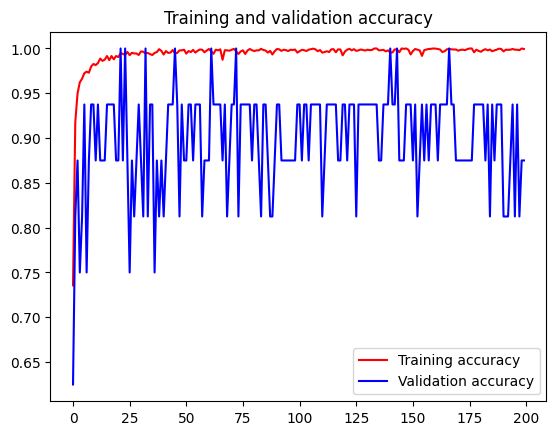

<Figure size 640x480 with 0 Axes>

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

In [16]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data)

print("Loss of the model is -", test_loss * 100, "%")
print("Accuracy of the model is -", test_accuracy * 100, "%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - acc: 0.7343 - loss: 11.0028
Loss of the model is - 1093.407154083252 %
Accuracy of the model is - 73.07692170143127 %


In [17]:
model.save("model2.h5")
model.save("pneumonia_model2.keras")

In [18]:
from tensorflow.keras.models import model_from_json # type: ignore
model_json = model.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)

In [19]:
import pickle

# Assuming your trained model is stored in a variable called 'model'
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as model.pkl")


Model saved as model.pkl
